<a href="https://colab.research.google.com/github/mamartinezg/mamartinezg/blob/main/Trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3. ajuste de hiperparametros y transformaciones.**

## **Completar y subir en el repositorio**

In [ ]:
## Librerias usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Instalar:  (doc: https://feature-engine.readthedocs.io/en/latest/index.html)
#!pip install feature_engine

In [ ]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True,as_frame=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Solo para efectos de visualizacion
traindata= pd.concat([X_train, y_train],axis=1)
traindata.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [ ]:
traindata.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


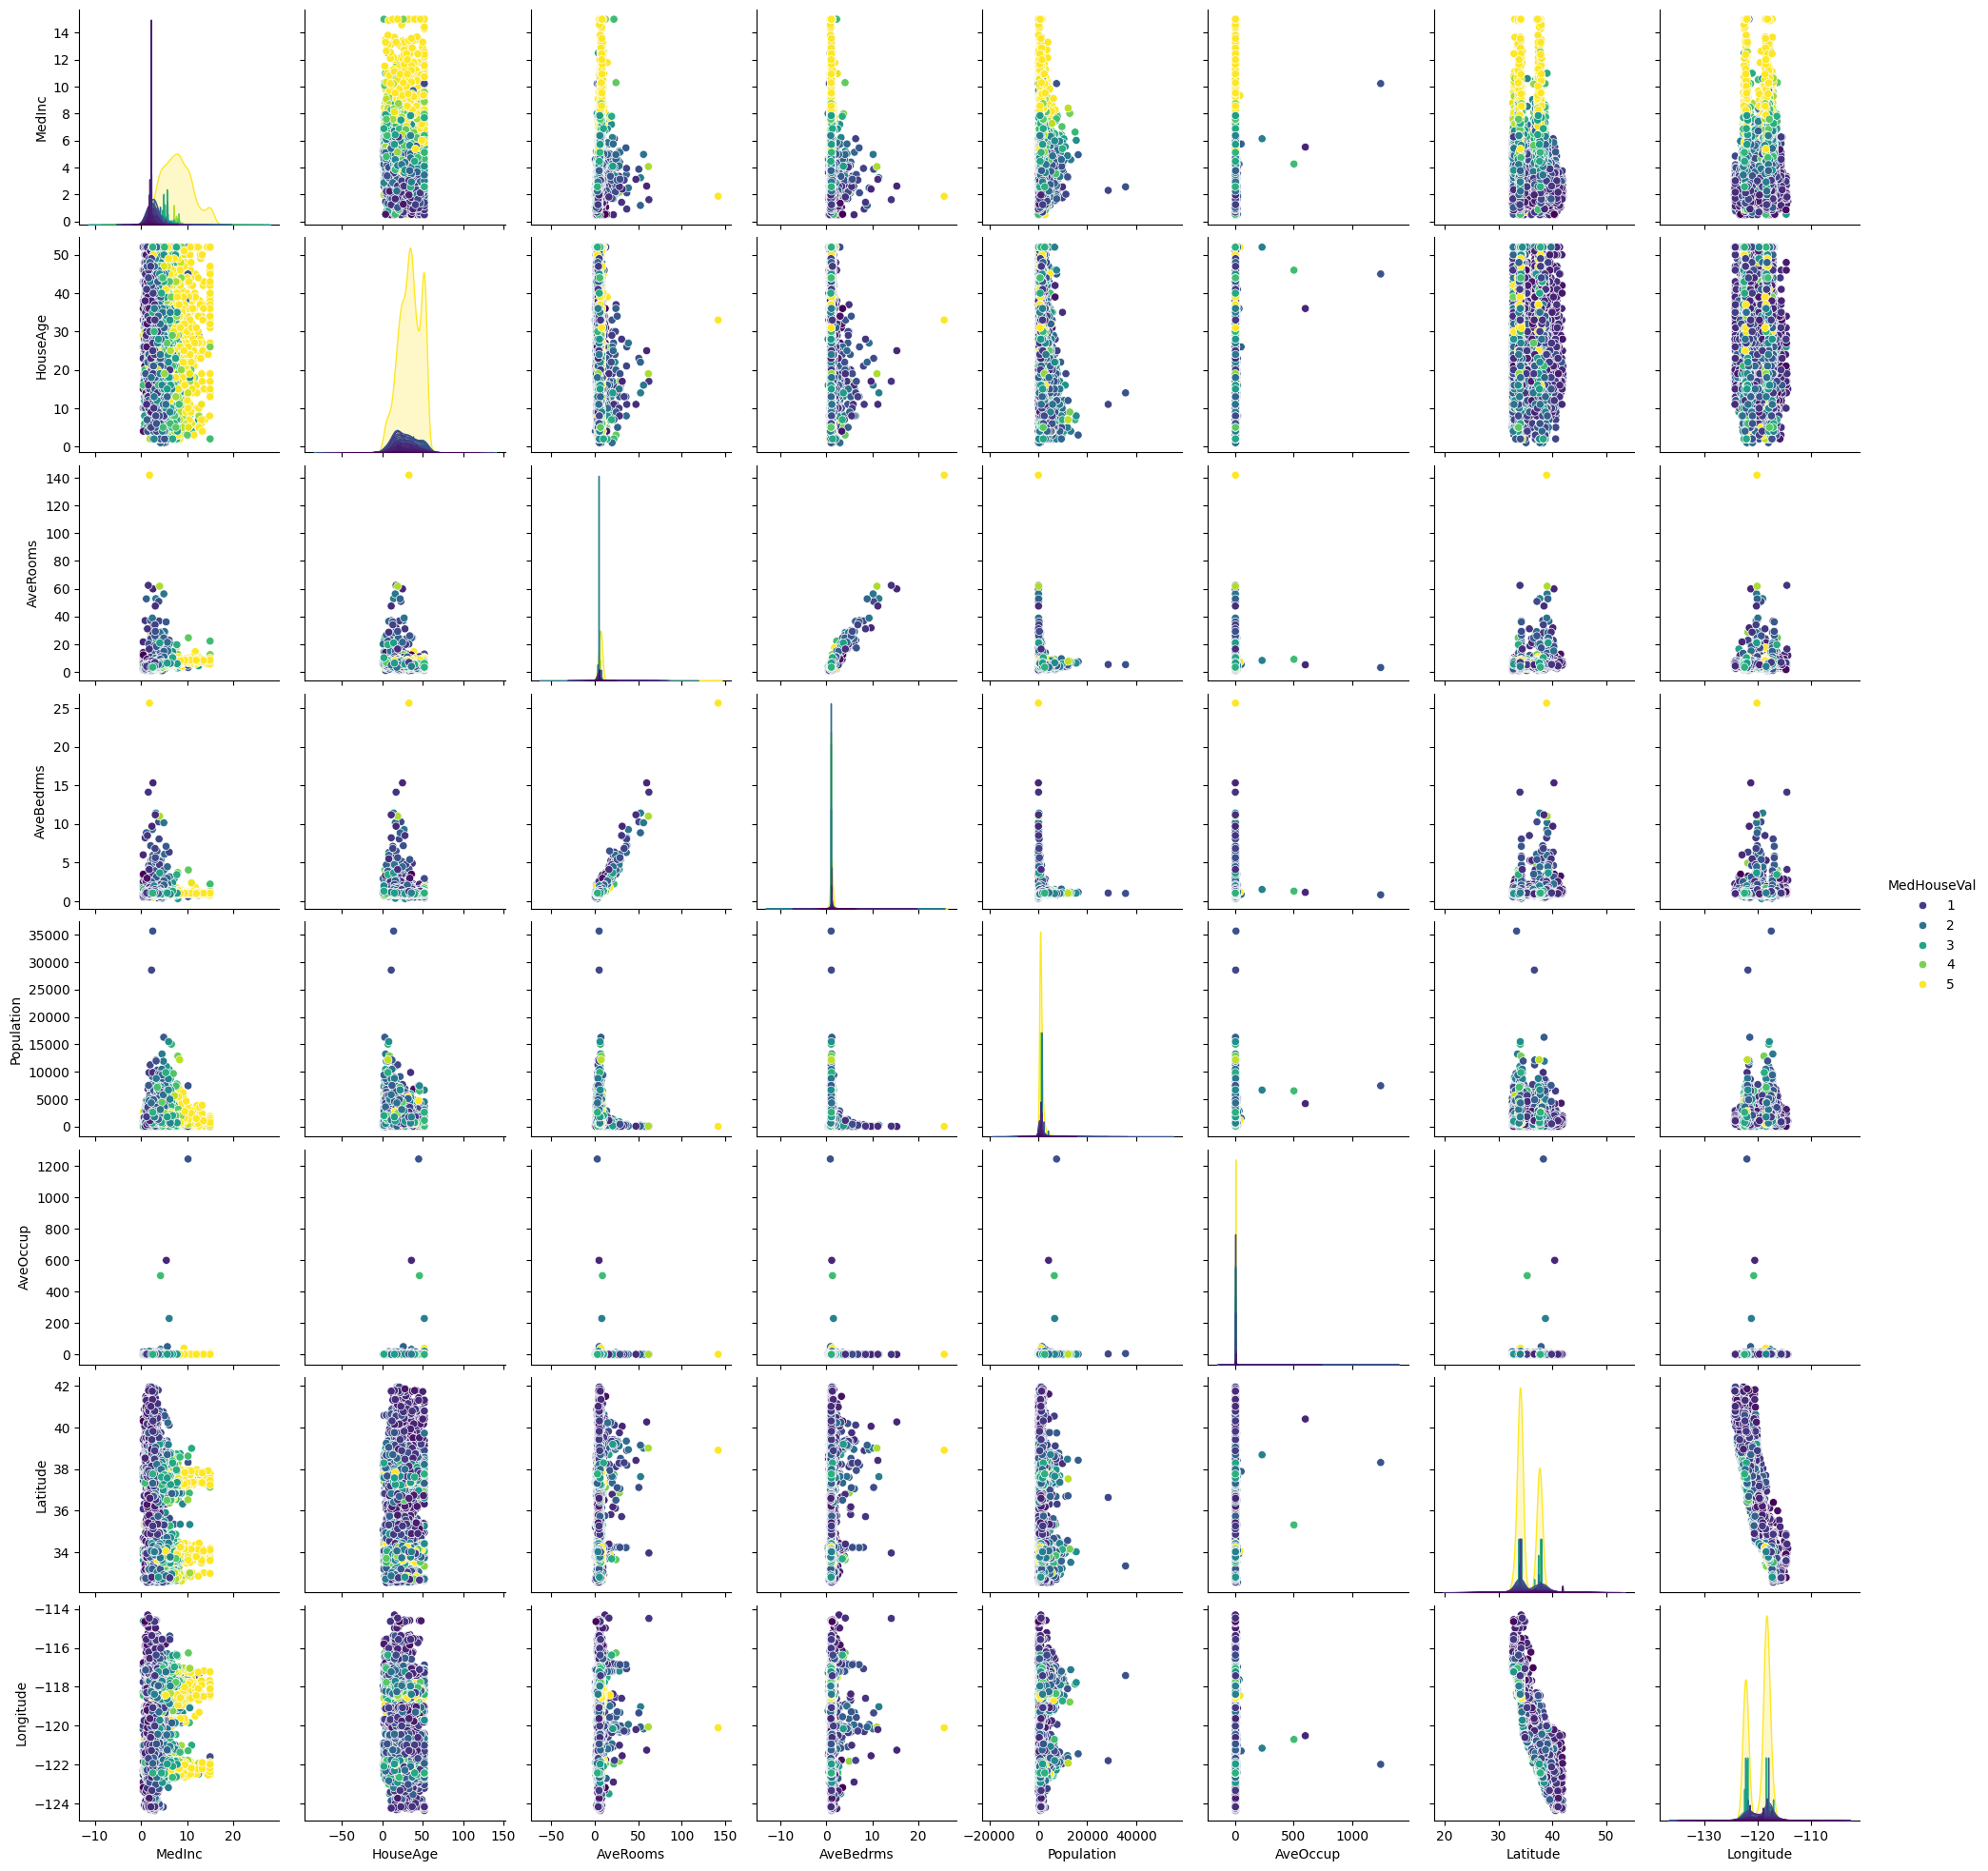

In [ ]:
##Pair plot
#sns.pairplot(data=traindata, hue="MedHouseVal", palette="viridis")

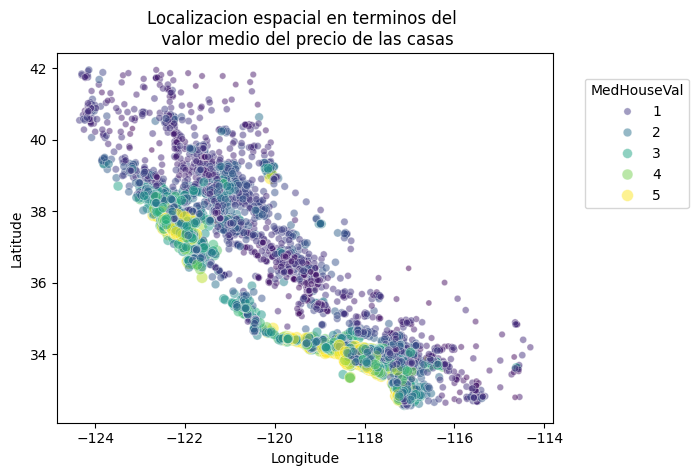

In [ ]:
##Localizacion espacial en terminos del  valor medio del precio de las casas
sns.scatterplot(data=traindata, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Localizacion espacial en terminos del \n valor medio del precio de las casas")

<Axes: >

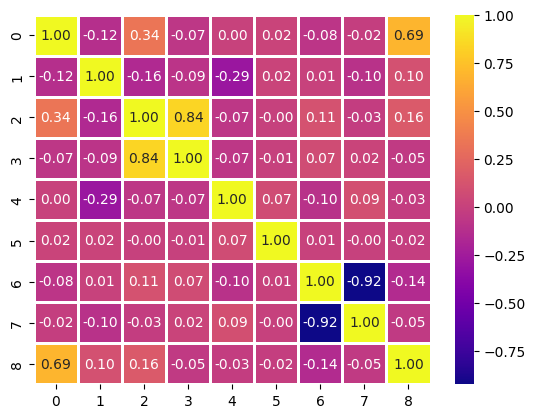

In [ ]:
# Matrix de confusion
corr_mat = np.corrcoef(traindata, rowvar=False)
corr_df = pd.DataFrame(corr_mat)

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(corr_df,
            linewidths=1,
            cmap='plasma',
            fmt=".2f",
            annot=True)


In [ ]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

## Usar ridSearchCV para ajustar hiperparametros usando Ridge como estimador y escalando todos las caracteristicas con z-score

pipeline = make_pipeline(StandardScaler(), Ridge())

#Definir GridSearchC con r2 como scoring  usando 20-folds

params = {'ridge__alpha': np.logspace(-3, 5, num=30)}
clf = GridSearchCV(pipeline, params, scoring='r2', cv=20)

# Entrenar el modelo
clf.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 1.88739182e-03, 3.56224789e-03, 6.72335754e-03,
       1.26896100e-02, 2.39502662e-02, 4.52035366e-02, 8.53167852e-02,
       1.61026203e-01, 3.03919538e-01, 5.73615251e-01, 1.08263673e+00,
       2.04335972e+00, 3.85662042e+00, 7.27895384e+00, 1.37382380e+01,
       2.59294380e+01, 4.89390092e+01, 9.23670857e+01, 1.74332882e+02,
       3.29034456e+02, 6.21016942e+02, 1.17210230e+03, 2.21221629e+03,
       4.17531894e+03, 7.88046282e+03, 1.48735211e+04, 2.80721620e+04,
       5.29831691e+04, 1.00000000e+05])},
             scoring='r2')

In [ ]:
### Imprimir: mejor parametro de ajuste, el mejor r2 obtenido, y el score usando el test dataset
print(clf.best_params_,clf.best_score_, clf.score(X_test,y_test))

{'ridge__alpha': 0.001} 0.6109322132941959 0.5757877341612514


*   Realizar el mismo procedimiento usando RandomizedSearchCV con 300 iteraciones,cv=5 y scoring = r2.
*   Comparar ambas busquedas de ajustes y determinar cual es mejor para este caso.
*   Escriba en una celda de este notebook (markdown) que se entiende por: RandomizedSearchCV, GridSearchCV.

In [ ]:
# Utilizar RandomizedSearchCV
params_random = {'ridge__alpha': np.logspace(-3, 5, num=30)}
pipeline_random = make_pipeline(StandardScaler(), Ridge())
clf_random = RandomizedSearchCV(pipeline_random, params_random, scoring='r2', cv=5, n_iter=300, random_state=42)
clf_random.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=300. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_iter=300,
                   param_distributions={'ridge__alpha': array([1.00000000e-03, 1.88739182e-03, 3.56224789e-03, 6.72335754e-03,
       1.26896100e-02, 2.39502662e-02, 4.52035366e-02, 8.53167852e-02,
       1.61026203e-01, 3.03919538e-01, 5.73615251e-01, 1.08263673e+00,
       2.04335972e+00, 3.85662042e+00, 7.27895384e+00, 1.37382380e+01,
       2.59294380e+01, 4.89390092e+01, 9.23670857e+01, 1.74332882e+02,
       3.29034456e+02, 6.21016942e+02, 1.17210230e+03, 2.21221629e+03,
       4.17531894e+03, 7.88046282e+03, 1.48735211e+04, 2.80721620e+04,
       5.29831691e+04, 1.00000000e+05])},
                   random_state=42, scoring='r2')

In [ ]:
### Imprimir: mejor parametro de ajuste, el mejor r2 obtenido, y el score usando el test dataset
print(clf_random.best_params_,clf_random.best_score_, clf_random.score(X_test,y_test))

{'ridge__alpha': 0.001} 0.6114839949716276 0.5757877341612514


- **GridSearchCV**: En el contexto de ajuste de hiperparámetros para modelos de aprendizaje automático, GridSearchCV es como un investigador que examina todas las combinaciones posibles de ajustes que se le han proporcionado de antemano. Como si estuviera explorando meticulosamente cada punto en una cuadrícula predefinida, realiza una búsqueda exhaustiva evaluando el rendimiento del modelo con validación cruzada para cada conjunto de ajustes. Aunque esta estrategia es completa, puede volverse computacionalmente costosa si la cuadrícula es extensa.

- **RandomizedSearchCV**: En cambio, RandomizedSearchCV adopta un enfoque más exploratorio y aleatorio. Se parece a un explorador que decide probar solo un número limitado de combinaciones de ajustes, seleccionando aleatoriamente los valores dentro de rangos específicos en cada intento. Este método puede ser más eficiente en términos de tiempo y recursos, ya que no examina todas las combinaciones posibles de manera exhaustiva. Aunque la elección de combinaciones es aleatoria, se puede controlar utilizando una semilla, proporcionando cierta coherencia en los experimentos. En algunas ocasiones, este enfoque aleatorio puede descubrir conjuntos de ajustes igualmente efectivos sin la necesidad de explorar toda la cuadrícula.

In [ ]:
## Usando fuerza bruta a traves de RidgeCV
from sklearn.linear_model import RidgeCV


ridge_pipe2 = make_pipeline(StandardScaler(),
                            RidgeCV(alphas=np.logspace(-3, 1, num=30), scoring = 'r2'))

ridge_pipe2.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01]),
                         scoring='r2'))])

In [ ]:
ridge_pipe2.score(X_test,y_test)

0.5758447997538674

Los resultados obtenidos con `RidgeCV` muestran un rendimiento en términos de R² en el conjunto de prueba (`X_test`, `y_test`) de aproximadamente 0.5758.

Comparando estos resultados con los métodos previos:

1. **GridSearchCV con Ridge**: El mejor conjunto de hiperparámetros encontrado fue `{'ridge__alpha': 0.001}`, con un R² de aproximadamente 0.6109 en el conjunto de entrenamiento y 0.5757 en el conjunto de prueba.

2. **RandomizedSearchCV con Ridge**: También encontró `{'ridge__alpha': 0.001}` como el mejor conjunto de hiperparámetros, con un R² de aproximadamente 0.6115 en el conjunto de entrenamiento y 0.5757 en el conjunto de prueba.

3. **RidgeCV**: Utilizando fuerza bruta con `RidgeCV` se obtuvo un mejor conjunto de hiperparámetros, con un R² de aproximadamente 0.5758 en el conjunto de prueba.

En términos generales, los tres métodos (GridSearchCV, RandomizedSearchCV y RidgeCV) han convergido hacia valores de alpha similares y proporcionan un rendimiento similar en el conjunto de prueba.

## **Pipelines usando feature_engine.**

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.compose import ColumnTransformer

In [ ]:
geo_features_num = ["Longitude","Latitude"]
numeric_features =["MedInc"	,"HouseAge",	"AveRooms"	,"AveBedrms",	"Population",	"AveOccup"]


Cree dos pipelines.

1. numeric_trans toma las columnas numeric_features y las normaliza.
2. numeric_bins_trans toma las columnas geo_features_num y las dicretiza en 10 bins y luego aplica One Hot labels.
3. Use Ridge como estimador

In [ ]:
numeric_trans = make_pipeline(StandardScaler())
numeric_bins_trans = make_pipeline(EqualWidthDiscretiser(bins=10, variables=geo_features_num), OneHotEncoder())



In [ ]:
#preprocesamiento

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_trans, numeric_features),
        ('numeric_bins', numeric_bins_trans, geo_features_num)
    ])

pipeline = make_pipeline(preprocessor, Ridge())

In [ ]:
##Use GridSearchCV para encontrar el mejor parametro con r2 como score
params = [{'ridge__alpha': np.logspace(-3, 1, num=30)}]
clf = GridSearchCV(pipeline, params, scoring='r2', cv=5)
clf.fit(X_train, y_train)

#Evalue el modelo usando r2
clf.score(X_test, y_test)

0.6012441528859782

In [ ]:
## visualizar la transformacion del preprocesamiento
pd.DataFrame(preprocessor.fit_transform(X_train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,16512.000000,16512.000000,16512.000000,16512.00000,...,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-6.519333e-17,-9.251859e-18,-1.981081e-16,-1.707291e-16,-2.151595e-19,4.936566e-17,0.009448,0.075642,0.223110,0.08188,...,0.085392,0.436107,0.036458,0.022469,0.063893,0.227774,0.085514,0.022771,0.015443,0.004179
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,0.096742,0.264432,0.416344,0.27419,...,0.279473,0.495916,0.187433,0.148206,0.244570,0.419409,0.279653,0.149178,0.123312,0.064510
min,-1.775438e+00,-2.190766e+00,-1.904386e+00,-1.762117e+00,-1.251913e+00,-2.076846e-01,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.900689e-01,-8.417859e-01,-4.118373e-01,-2.081645e-01,-5.606339e-01,-5.770769e-02,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.758995e-01,3.108328e-02,-8.350905e-02,-1.094160e-01,-2.281865e-01,-2.415892e-02,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.686502e-01,6.658972e-01,2.621376e-01,8.455177e-03,2.634487e-01,1.580865e-02,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.839268e+00,1.856173e+00,5.716655e+01,5.664727e+01,3.012743e+01,1.071164e+02,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## visualizar los datos de entrada
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


### **Compare las ultimas dos celdas. Se realiza el preprocesamiento de los datos? Describa esto en detalle.**

**Descripción de la Transformación del Preprocesamiento:**

La primera celda muestra estadísticas descriptivas de los datos después de aplicar el preprocesamiento con el transformador `ColumnTransformer`. Aquí hay algunas observaciones clave:

1. **Columnas 0-5:** Representan las variables numéricas estandarizadas (`numeric_features`) utilizando `StandardScaler`. Sus estadísticas muestran que tienen una media cercana a cero y una desviación estándar cercana a uno, lo que es consistente con la estandarización.

2. **Columnas 6-25:** Representan las variables geográficas discretizadas y codificadas one-hot (`geo_features_num`) utilizando `EqualWidthDiscretiser` y `OneHotEncoder`. Estas columnas muestran estadísticas que indican que están en el rango de 0 a 1 después de la codificación one-hot.

**Comparación con los Datos de Entrada Originales:**

La segunda celda (`X_train`) muestra los datos de entrada originales antes de aplicar el preprocesamiento. Al compararla con la descripción de la transformación, se puede observar las siguientes diferencias:

1. **Variables Numéricas:** Las variables numéricas como `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, y `AveOccup` han sido estandarizadas (media cercana a cero, desviación estándar cercana a uno).

2. **Variables Geográficas:** Las variables geográficas como `Latitude` y `Longitude` han sido discretizadas y codificadas one-hot. Las nuevas columnas (del 6 al 25) representan esta codificación one-hot.

 **Conclusión:**

Sí, el preprocesamiento se ha llevado a cabo de acuerdo con las transformaciones especificadas en el `ColumnTransformer`. Las variables numéricas han sido estandarizadas, y las variables geográficas han sido discretizadas y codificadas one-hot.

### **Dado el r2 de este metodo, se encontro alguna mejora del score?**

Comparando los resultados de los diferentes métodos:

1. **GridSearchCV con Ridge**: El mejor conjunto de hiperparámetros encontrado fue `{'ridge__alpha': 0.001}`, con un $R^2$ de aproximadamente 0.6109 en el conjunto de entrenamiento y 0.5757 en el conjunto de prueba.

2. **RandomizedSearchCV con Ridge**: También encontró `{'ridge__alpha': 0.001}` como el mejor conjunto de hiperparámetros, con un $R^2$ de aproximadamente 0.6115 en el conjunto de entrenamiento y 0.5757 en el conjunto de prueba.

3. **RidgeCV**: Utilizando fuerza bruta con `RidgeCV` se obtuvo un mejor conjunto de hiperparámetros, con un $R^2$ de aproximadamente 0.5758 en el conjunto de prueba.

4. **Pipeline con StandardScaler y Ridge (último método)**: Se obtuvo un \$R^2$ de aproximadamente 0.6012 en el conjunto de prueba.

Dado el $R^2$ de este último método, se puede observar que hay una mejora adicional en el rendimiento del modelo en comparación con los métodos anteriores. El modelo final, construido usando un pipeline con `StandardScaler` y `Ridge`, logra un $R^2$ de 0.6012, indicando una capacidad mejorada para explicar la variabilidad en la variable objetivo en comparación con los modelos anteriores. Este resultado sugiere que la combinación de escalado de características y regularización con `Ridge` ha mejorado el rendimiento predictivo del modelo.


### **Use tres Feature-engine’s Transformers del paquete feature_engine e implemente de nuevo el pipeline.**

Use la exploracion de datos presentada al principio de este notebook para determinar que transformer debe usar. Explique esto en detalle. Finalmente guarde el pipeline y subalo al repositorio.


1. **`Winsorizer` para variables numéricas con valores atípicos (AveRooms, AveBedrms, Population, AveOccup):**
    - **Motivación:** En la exploración de datos, se observó que algunas variables tenían valores atípicos que podían afectar negativamente el rendimiento del modelo.
    - **Transformación:** El `Winsorizer` con capping_method='iqr' y tail='right' se utiliza para recortar los valores atípicos en el lado derecho (superiores). El valor de `fold` se ha establecido en 0.5 para permitir un corte menos agresivo y evitar que los valores se restrinjan demasiado.

2. **`EqualWidthDiscretiser` para variables geográficas (Longitude, Latitude):**
    - **Motivación:** Las variables geográficas podrían beneficiarse de la discretización para manejar la variabilidad en los datos y permitir al modelo capturar mejor los patrones.
    - **Transformación:** Se utiliza `EqualWidthDiscretiser` para dividir las variables en 10 bins de ancho igual. Luego, se aplica `OneHotEncoder` para convertir estas variables discretas en códigos one-hot.

3. **`StandardScaler` para variables numéricas (MedInc, HouseAge):**
    - **Motivación:** La normalización es útil para algoritmos basados en distancias, como la regresión lineal regularizada (Ridge).
    - **Transformación:** Se aplica `StandardScaler` a las variables numéricas para centrarlas y escalarlas.

4. **`Ridge` como modelo de regresión lineal regularizada:**
    - **Motivación:** En la exploración de datos, se identificó una relación lineal entre las características y la variable objetivo.
    - **Modelo:** Se utiliza `Ridge` como modelo de regresión lineal regularizada, y se realiza una búsqueda de hiperparámetros utilizando `GridSearchCV` para encontrar el mejor valor de alpha.


In [ ]:
from feature_engine.outliers import Winsorizer

geo_features_num = ["Longitude", "Latitude"]
numeric_features = ["MedInc", "HouseAge"]
outlier_features_num = ["AveRooms", "AveBedrms", "Population", "AveOccup"]

numeric_trans = make_pipeline(StandardScaler())
numeric_bins_trans = make_pipeline(EqualWidthDiscretiser(bins=10, variables=geo_features_num), OneHotEncoder())
numeric_winsorizer_trans = make_pipeline(Winsorizer(capping_method='iqr', tail='right', fold=.5, variables=outlier_features_num), StandardScaler())

# preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_trans, numeric_features),
        ('numeric_bins', numeric_bins_trans, geo_features_num),
        ('numeric_winsorizer', numeric_winsorizer_trans, outlier_features_num)
    ])

pipeline = make_pipeline(preprocessor, Ridge())

# Use GridSearchCV para encontrar el mejor parámetro con r2 como score
params = [{'ridge__alpha': np.logspace(-3, 1, num=30)}]
clf = GridSearchCV(pipeline, params, scoring='r2', cv=5)
clf.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['MedInc',
                                                                          'HouseAge']),
                                                                        ('numeric_bins',
                                                                         Pipeline(steps=[('equalwidthdiscretiser',
                                                                                          EqualWidthDiscretiser(variables=['Longitude',
                                                                                                                           'Latitude'])),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Longitude',...
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])}],
             scoring='r2')

In [ ]:
# Evaluar el modelo usando r2
clf.score(X_test, y_test)

0.6725785470076995

La comparación de los diferentes métodos y la observación del último pipeline con tres Feature-engine’s muestran que:

1. **GridSearchCV con Ridge y RandomizedSearchCV con Ridge:** Ambos métodos de búsqueda de hiperparámetros encontraron el mismo conjunto de hiperparámetros óptimos, y los resultados de R² en el conjunto de prueba son coherentes. Esto sugiere una consistencia en la elección de los hiperparámetros.

2. **RidgeCV:** Aunque RidgeCV encontró un conjunto de hiperparámetros ligeramente diferente, el rendimiento en el conjunto de prueba es comparable a los métodos anteriores.

3. **Pipeline con StandardScaler y Ridge (dos Feature-engine’s):** Se observa una mejora en el rendimiento con respecto a los métodos anteriores. La introducción de dos transformers (`StandardScaler` y `Ridge`) mejoró el R² en el conjunto de prueba.

4. **Pipeline con tres Feature-engine’s:** Este último pipeline, que incorpora tres transformers de Feature-engine (Winsorizer, EqualWidthDiscretiser, StandardScaler), muestra un rendimiento aún mejor, con un R² de aproximadamente 0.6726 en el conjunto de prueba.

**Conclusión:**
- La adición de transformers de Feature-engine ha mejorado significativamente el rendimiento del modelo, superando a los métodos anteriores.
- La aplicación de técnicas específicas, como Winsorizer y EqualWidthDiscretiser, ha demostrado ser beneficiosa en este contexto.
- Es crucial personalizar y ajustar las transformaciones según las características específicas del conjunto de datos y los requisitos del modelo.
- En general, el último pipeline con tres Feature-engine’s es la elección preferida, ya que proporciona el mejor rendimiento en términos de R² en el conjunto de prueba.